# District Name

# Upazilla Names

# Districts Map

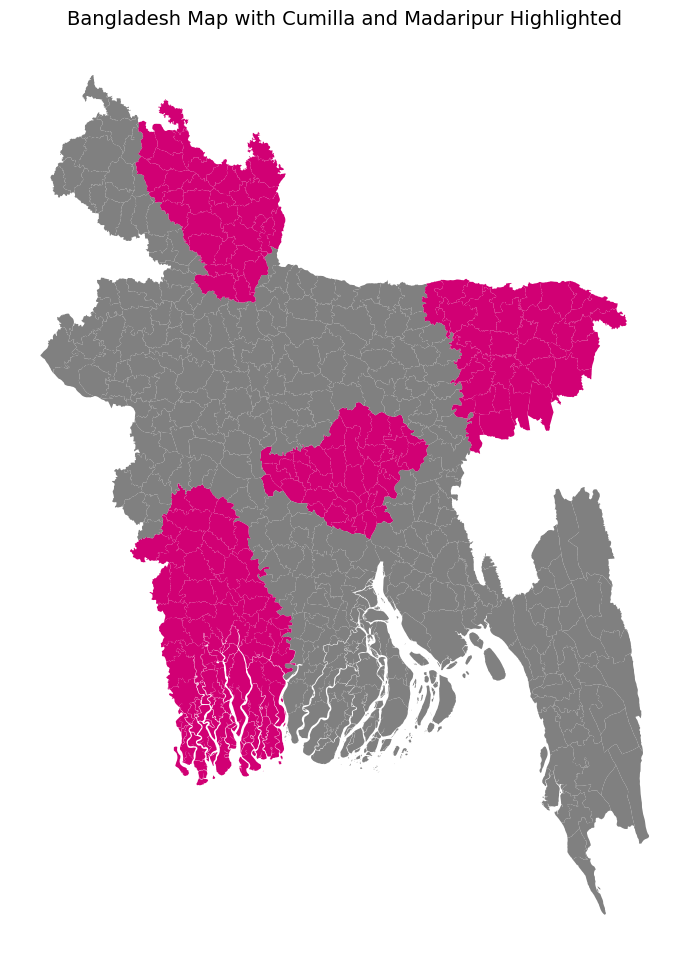

In [29]:
import geopandas as gpd
import json
import matplotlib.pyplot as plt

# Load Bangladesh district boundaries (GeoJSON)
geojson_path = "bangladesh.geojson"
bd_map = gpd.read_file(geojson_path)

# Load district names from bd-districts.json
json_path = "bd-districts.json"
with open(json_path, "r", encoding="utf-8") as file:
    district_data = json.load(file)

# Set the correct column containing district names
district_column = "NAME_2"  # Ensure this is the correct one

# Districts to highlight
highlighted_districts = ["Khulna", "Dhaka", "Ranpur", "Jessore", "Sylhet"]  # Adjust spelling if needed

# Define colors
highlight_color = "#D10074"  # RGB (209, 0, 116)
default_color = "grey"

# Apply color mapping
bd_map["color"] = bd_map[district_column].apply(
    lambda x: highlight_color if x in highlighted_districts else default_color
)

# Plot the map without borders
fig, ax = plt.subplots(figsize=(10, 12))
bd_map.plot(ax=ax, color=bd_map["color"], edgecolor="none")  # Remove district borders

# Remove text labels
# for idx, row in bd_map.iterrows():
#     plt.text(
#         row.geometry.centroid.x,
#         row.geometry.centroid.y,
#         row[district_column],
#         fontsize=6,
#         ha="center",
#         color="black"
#     )

# Formatting
plt.title("Bangladesh Map with Cumilla and Madaripur Highlighted", fontsize=14)
plt.axis("off")

# Save and display the cleaned-up map
plt.savefig("bangladesh_map_no_borders.png", dpi=300)
plt.show()


# Bangladesh Whole Map

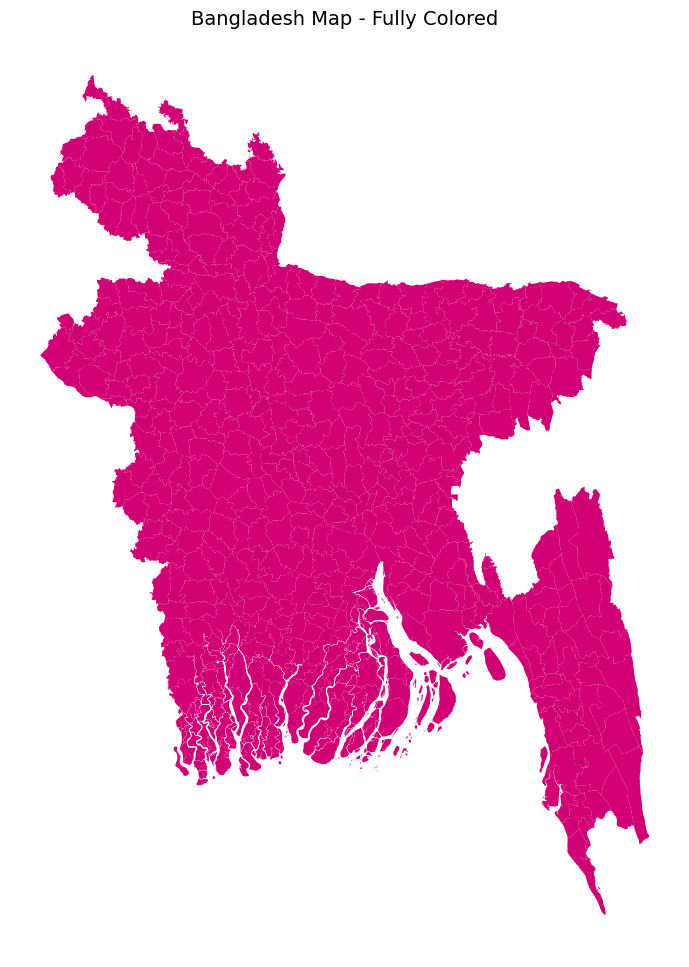

In [17]:
import geopandas as gpd
import json
import matplotlib.pyplot as plt

# Load Bangladesh district boundaries (GeoJSON)
geojson_path = "bangladesh.geojson"
bd_map = gpd.read_file(geojson_path)

# Define color for the entire map
map_color = "#D10074"  # RGB (209, 0, 116)

# Plot the full map with no district borders
fig, ax = plt.subplots(figsize=(10, 12))
bd_map.plot(ax=ax, color=map_color, edgecolor="none")  # No borders, full fill

# Formatting
plt.title("Bangladesh Map - Fully Colored", fontsize=14)
plt.axis("off")

# Save and display the map
plt.savefig("bangladesh_full_map.png", dpi=300)
plt.show()


# Upazilla Map

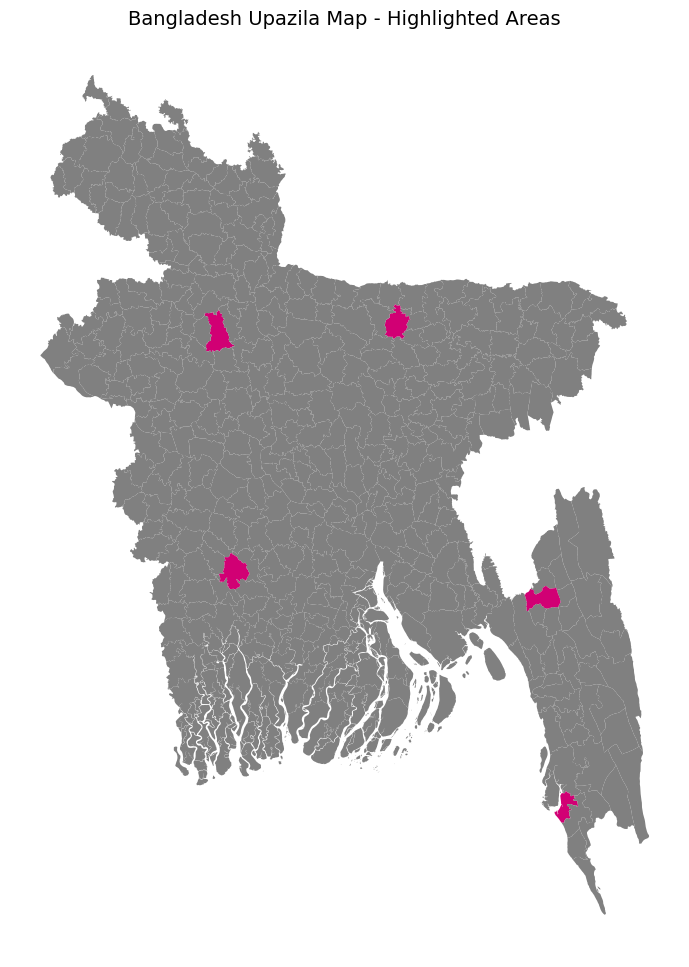

In [53]:
import geopandas as gpd
import json
import matplotlib.pyplot as plt

# Load Bangladesh Upazila boundaries (GeoJSON)
geojson_path = "bangladesh.geojson"  # Replace with the actual Upazila GeoJSON if available
bd_map = gpd.read_file(geojson_path)

# Load Upazila names from bd-upazilas.json
json_path = "bd-upazilas.json"
with open(json_path, "r", encoding="utf-8") as file:
    upazila_data = json.load(file)

# Extract Upazila names (mapping id to name) - not directly used for coloring here
upazila_names = {entry["id"]: entry["name"] for entry in upazila_data["upazilas"]}

# Set the correct column containing Upazila names
upazila_column = "NAME_4"  # Adjust if needed based on the actual dataset structure

# Upazilas to highlight (must match exactly with the names in the GeoJSON)
highlighted_upazilas = ["Ramgarh", "Bogra S.", "Cox Bazar S", "Netrokona S.","Narail S."]

# Normalize the highlighted names: convert to lowercase and strip whitespace
highlighted_norm = [name.lower().strip() for name in highlighted_upazilas]

# Define colors
highlight_color = "#D10074"  # RGB (209, 0, 116)
default_color = "grey"

# Apply color mapping with normalization of the GeoJSON names
bd_map["color"] = bd_map[upazila_column].apply(
    lambda x: highlight_color if x.lower().strip() in highlighted_norm else default_color
)

# Plot the map without borders
fig, ax = plt.subplots(figsize=(10, 12))
bd_map.plot(ax=ax, color=bd_map["color"], edgecolor="none")  # No borders

# Formatting
plt.title("Bangladesh Upazila Map - Highlighted Areas", fontsize=14)
plt.axis("off")

# Save and display the cleaned-up map
plt.savefig("bangladesh_upazila_map.png", dpi=300)
plt.show()
